<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Importing modules
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GroupKFold, TimeSeriesSplit
from sklearn.metrics import median_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import optuna
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures
import shap

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Reading dataframe
</div>

In [2]:
train_df = pd.read_csv('/kaggle/input/playground-series-s3e25/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s3e25/test.csv')
submission = pd.read_csv('/kaggle/input/playground-series-s3e25/sample_submission.csv')

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Inspecting dataframes </div>

In [3]:
train_df.columns

Index(['id', 'allelectrons_Total', 'density_Total', 'allelectrons_Average',
       'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
       'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
       'zaratio_Average', 'density_Average', 'Hardness'],
      dtype='object')

In [4]:
test_df.columns

Index(['id', 'allelectrons_Total', 'density_Total', 'allelectrons_Average',
       'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
       'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
       'zaratio_Average', 'density_Average'],
      dtype='object')

In [5]:
test_df 

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,10407,884.0,121.420000,35.360000,5.280000,82.561240,9.370384,2.298000,1.907200,1.200000,0.461899,1.79459
1,10408,90.0,9.931960,18.000000,5.600000,39.568056,12.086300,2.868000,1.652000,0.864000,0.476196,1.41194
2,10409,116.0,7.767992,11.600000,4.800000,23.231818,11.023840,2.644000,1.794000,0.960000,0.499514,0.78834
3,10410,100.0,9.107996,10.000000,4.800000,20.298893,12.086300,2.828000,1.662000,0.792000,0.495796,1.20466
4,10411,55.0,4.030000,11.000000,4.000000,22.977675,11.280950,2.455000,1.750000,0.893333,0.476095,0.93456
...,...,...,...,...,...,...,...,...,...,...,...,...
6934,17341,446.0,36.135392,9.636364,4.636364,19.689448,11.045515,2.768636,1.769697,0.871818,0.498702,0.11548
6935,17342,36.0,3.550000,18.000000,4.000000,36.068500,8.236600,1.790000,2.055000,1.390000,0.499000,1.35045
6936,17343,68.0,4.545328,11.333333,5.333333,22.688853,10.938358,2.876667,1.713333,0.916667,0.499074,0.73425
6937,17344,40.0,2.334164,6.666667,4.000000,13.016128,12.700467,2.770000,1.476667,0.616667,0.663797,0.51227


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Function to plot correlation matrix </div>

In [6]:
def plot_heatmap(df, title):
    mask = np.triu(np.ones_like(df.corr()))
    
    colormap = sns.cubehelix_palette(n_colors=15, start=.46, rot=-.45, dark=.2, hue=0.95, as_cmap=True)
    
    plt.figure(figsize=(25, 25))
    
    plt.title(f'Correlation of Features in {title}', fontweight='bold', y=1.02, size=20)
    
    sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, vmin=-1.0,
                square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 10, "weight": "bold"},
                mask=mask)


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Visualizing correlation matrix </div>

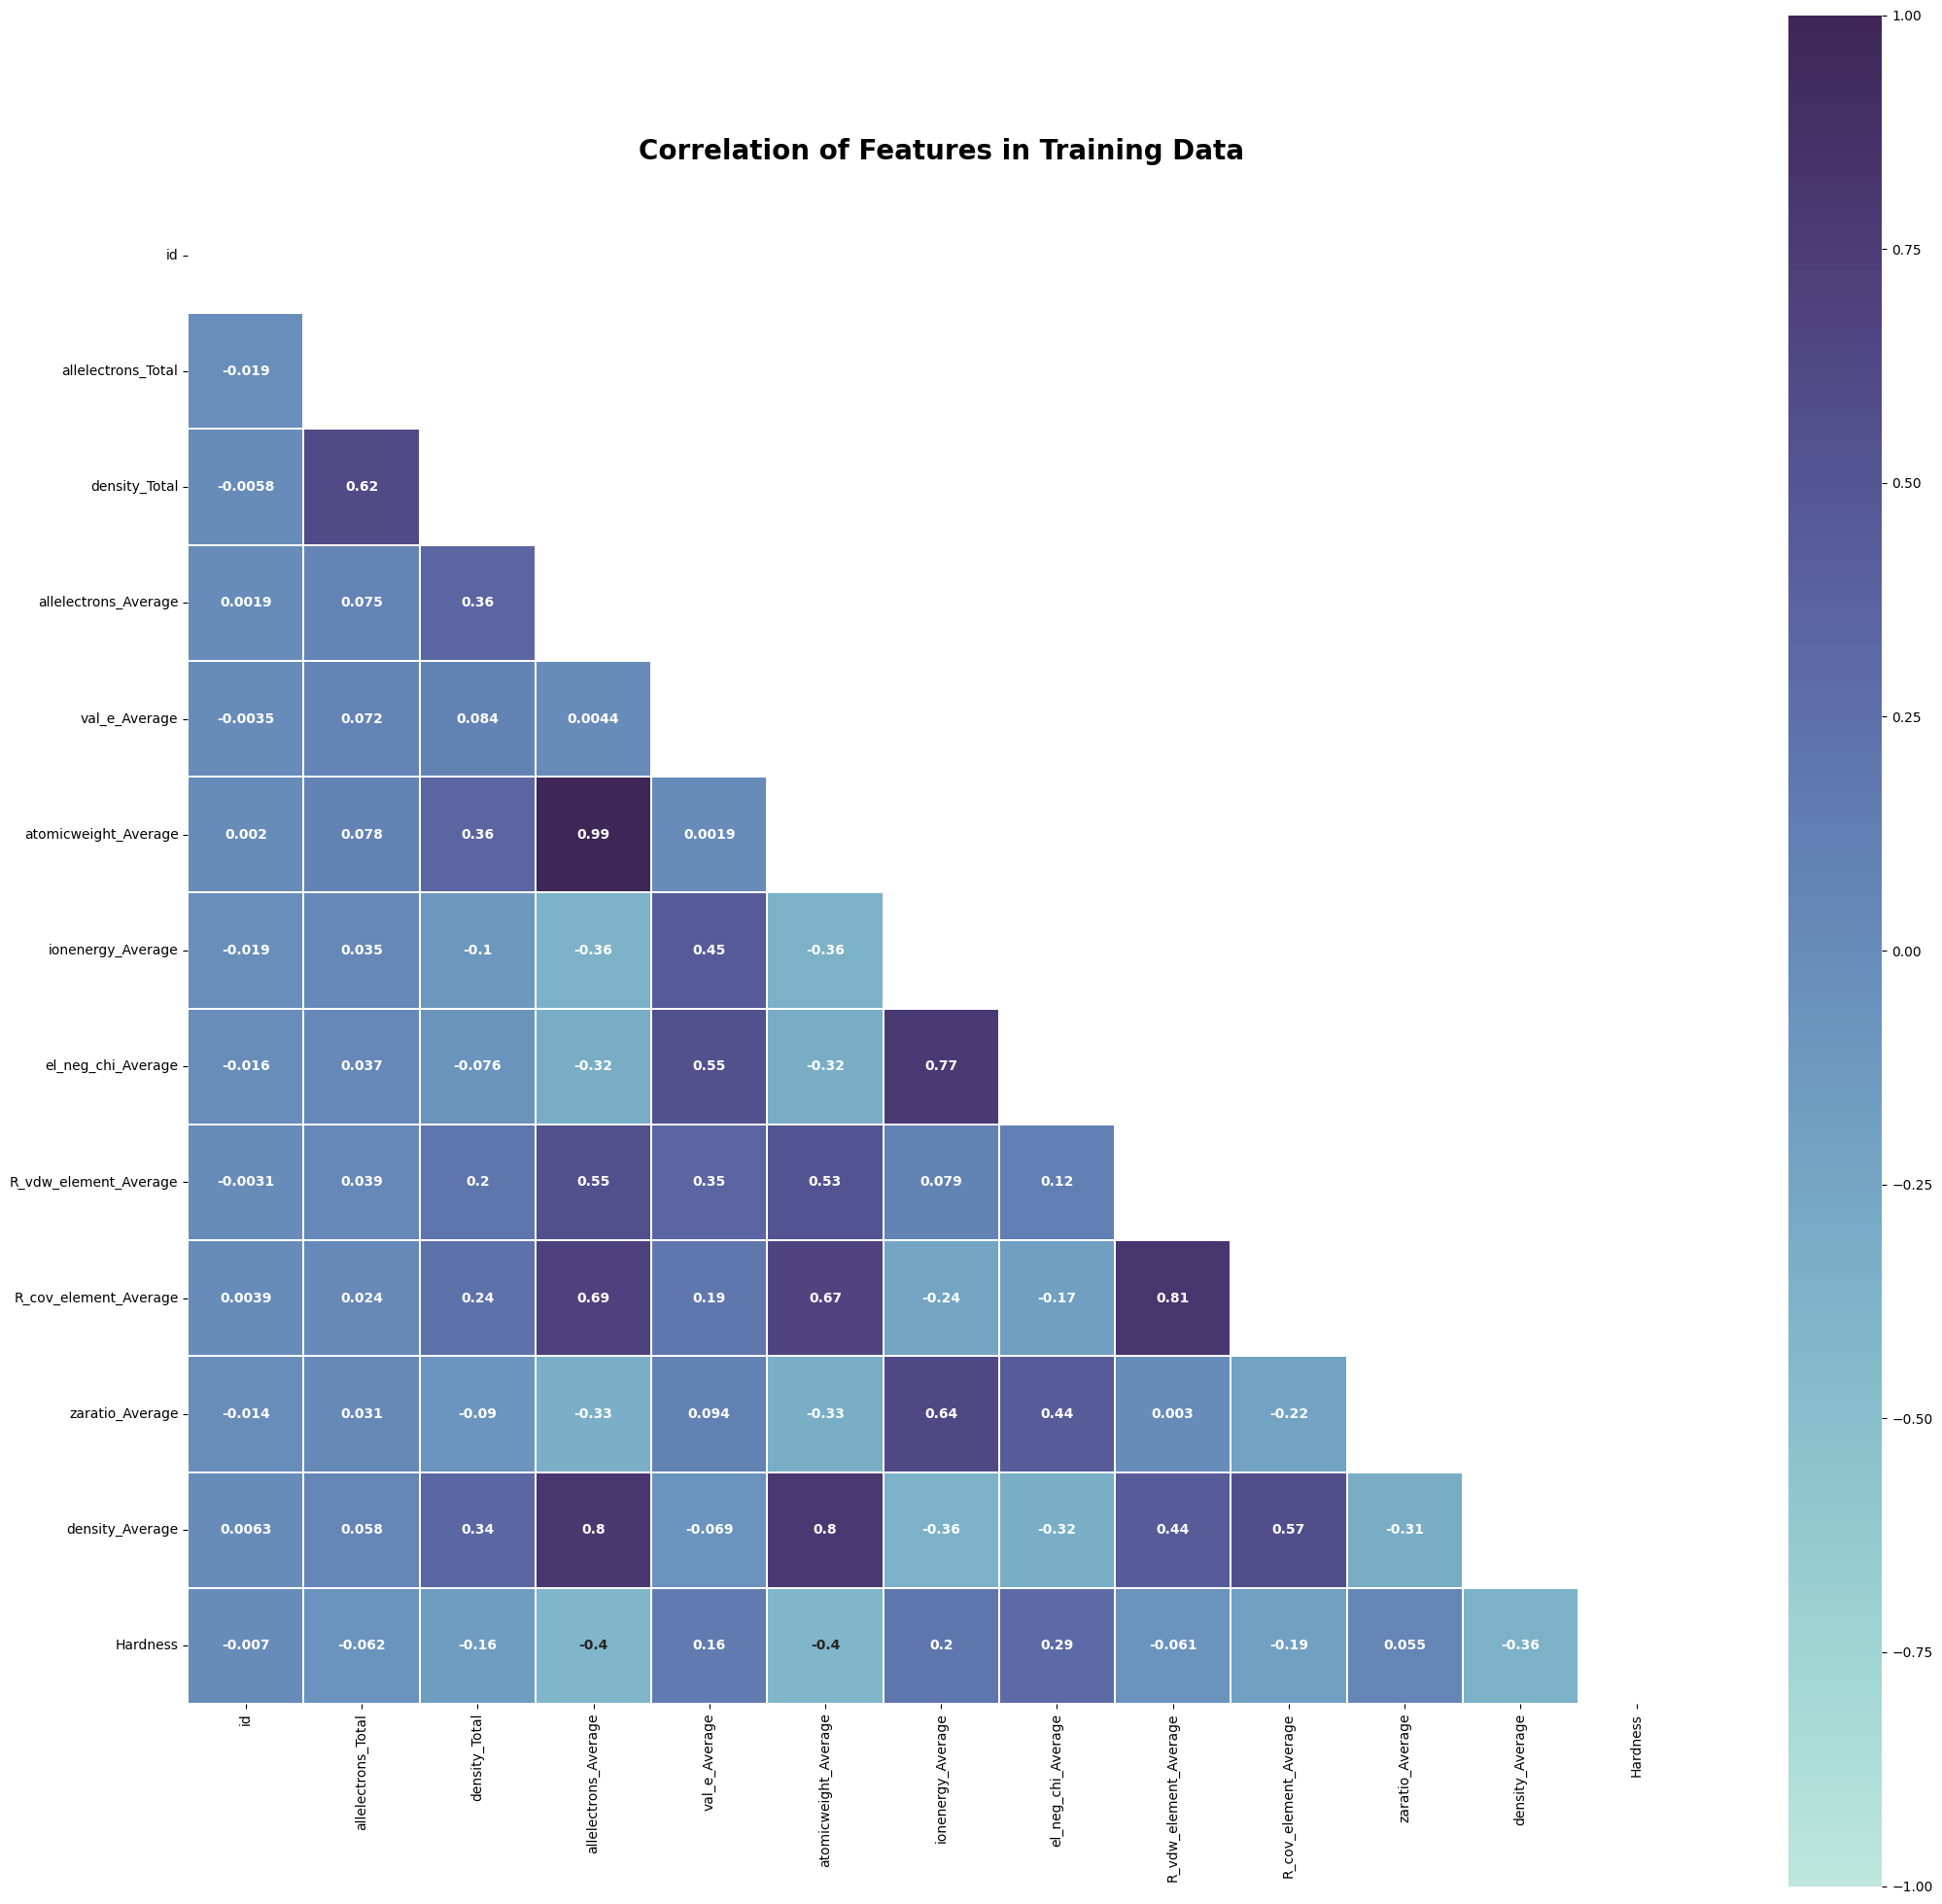

In [7]:
plot_heatmap(train_df, "Training Data")

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Visualizing data distributions using histplots</div>

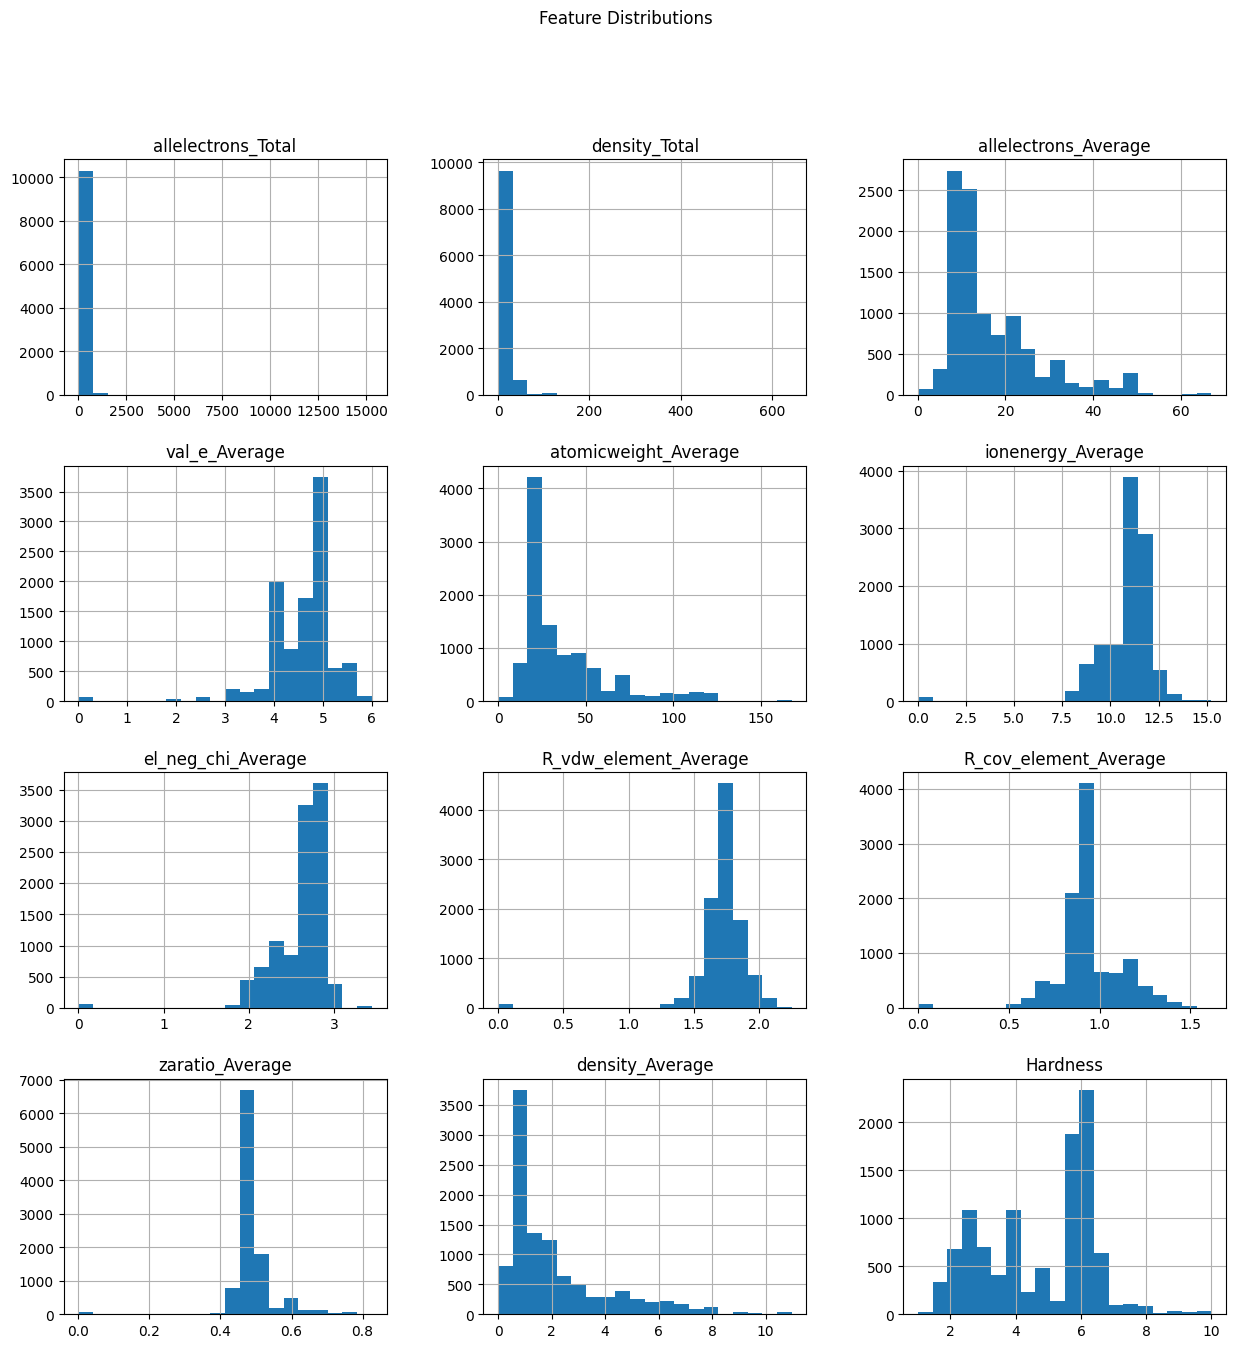

In [8]:
train_df.drop(columns=['id']).hist(bins=20, figsize=(15, 15))
plt.suptitle('Feature Distributions')
plt.show()

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Checking missing values </div>

In [9]:
missing_values = train_df.isnull().sum()
train_df = train_df.dropna()

In [10]:
train_df

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.000000,4.800000,20.612526,11.088100,2.766000,1.732000,0.860000,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.000000,4.800000,20.298893,12.040830,2.755000,1.631000,0.910000,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.600000,5.600000,33.739258,12.086300,2.828000,1.788000,0.864000,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.000000,4.800000,20.213349,10.948500,2.648000,1.626000,0.936000,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.600000,4.800000,24.988133,11.824480,2.766000,1.682000,0.896000,0.492736,1.86481,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10402,10402,128.0,7.558488,12.000000,4.000000,26.385218,11.330440,2.644000,1.631000,0.892000,0.496070,1.79607,4.0
10403,10403,30.0,1.743160,10.000000,5.333333,20.766935,14.163933,3.090000,1.556667,0.866667,0.480390,0.81480,5.0
10404,10404,196.0,30.920000,24.500000,5.500000,53.490297,10.074300,2.295000,1.545000,1.120000,0.469715,2.11540,1.8
10405,10405,38.0,1.553160,12.666667,4.666667,26.621687,11.290033,2.743333,1.756667,0.980000,0.486507,0.77755,6.0


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Drop unneccessary columns </div>

In [11]:
drop_cols = ["id"]
train_df = train_df.drop(drop_cols, axis=1)
test_df = test_df.drop(drop_cols, axis=1)

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Clipping outliers in the target variable </div>

In [12]:
train_df['Hardness'] = np.clip(train_df['Hardness'], a_min=train_df['Hardness'].quantile(0.01),
                               a_max=train_df['Hardness'].quantile(0.99))


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Scaling data </div>

In [13]:
scaler = StandardScaler()
train_df_scaled = scaler.fit_transform(train_df.drop(columns=['Hardness']))
test_df_scaled = scaler.transform(test_df)


In [14]:
train_df_scaled

array([[-0.12517576, -0.85459788, -0.67186349, ..., -0.46738057,
         0.0431392 , -0.62916306],
       [-0.12517576, -0.43406   , -0.67186349, ..., -0.18961507,
        -0.00998629, -0.7308742 ],
       [-0.23226459, -0.35094612, -0.1369116 , ..., -0.44515933,
        -0.18819689, -0.32359072],
       ...,
       [ 0.30317956,  1.02858414,  0.7132798 , ...,  0.97700004,
        -0.37468307, -0.00907986],
       [-0.4018219 , -0.81004841, -0.41712449, ...,  0.19925663,
        -0.10847429, -0.69991729],
       [ 0.71368675,  0.63635843, -0.56268963, ..., -0.02295577,
         0.00903126, -0.59673447]])

In [15]:
test_df_scaled

array([[ 3.37305938,  6.69471119,  1.75070435, ...,  1.42142484,
        -0.49859183, -0.17473935],
       [-0.1697961 , -0.28545896,  0.0923535 , ..., -0.44515933,
        -0.27193573, -0.37233172],
       [-0.0537832 , -0.42094313, -0.51902009, ...,  0.08815043,
         0.09773909, -0.69434556],
       ...,
       [-0.26796087, -0.62271135, -0.54449399, ..., -0.15257967,
         0.09076613, -0.72227649],
       [-0.39289784, -0.76115046, -0.99028723, ..., -1.81917269,
         2.70221482, -0.83690226],
       [ 0.02653342,  0.19400433,  4.77318253, ...,  2.58803996,
        -1.45399784, -0.87404023]])

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Defining hyperparam tuning objective for XGBoost model</div>

In [16]:
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

def objective(trial, train_data, train_target, cv_strategy, model_type):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'min_samples_split': trial.suggest_float('min_samples_split', 0.1, 1),
        'min_samples_leaf': trial.suggest_float('min_samples_leaf', 0.1, 0.5)
    }

    if model_type == 'RandomForest':
        model = RandomForestRegressor(**params)
    elif model_type == 'GradientBoosting':
        model = GradientBoostingRegressor(**params)

    medae_scores = cross_val_score(model, train_data, train_target, cv=cv_strategy, scoring='neg_median_absolute_error')

    return -np.mean(medae_scores)



<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Tuning the hyperparams </div>

In [17]:
study_rf = optuna.create_study(direction='minimize')
study_rf.optimize(lambda trial: objective(trial, train_df_scaled, train_df['Hardness'], KFold(n_splits=5, shuffle=True, random_state=42), 'RandomForest'), n_trials=50)

study_gb = optuna.create_study(direction='minimize')
study_gb.optimize(lambda trial: objective(trial, train_df_scaled, train_df['Hardness'], KFold(n_splits=5, shuffle=True, random_state=42), 'GradientBoosting'), n_trials=50)


[I 2023-11-22 10:35:04,433] A new study created in memory with name: no-name-20106e1c-eef1-4f04-abf5-e82c9a5fbf81
[I 2023-11-22 10:35:06,610] Trial 0 finished with value: 1.3627232272482108 and parameters: {'n_estimators': 191, 'max_depth': 9, 'min_samples_split': 0.28790893257225963, 'min_samples_leaf': 0.47795101518512273}. Best is trial 0 with value: 1.3627232272482108.
[I 2023-11-22 10:35:07,525] Trial 1 finished with value: 1.362868511903664 and parameters: {'n_estimators': 79, 'max_depth': 5, 'min_samples_split': 0.9152642013396292, 'min_samples_leaf': 0.16830735425017002}. Best is trial 0 with value: 1.3627232272482108.
[I 2023-11-22 10:35:09,108] Trial 2 finished with value: 1.3613124887601449 and parameters: {'n_estimators': 110, 'max_depth': 7, 'min_samples_split': 0.6776211529132433, 'min_samples_leaf': 0.37036668740302414}. Best is trial 2 with value: 1.3613124887601449.
[I 2023-11-22 10:35:10,684] Trial 3 finished with value: 1.363946032559629 and parameters: {'n_estimator

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Training final model with best hyperparams </div>

In [18]:
best_params_rf = study_rf.best_params
best_params_gb = study_gb.best_params
best_model_rf = RandomForestRegressor(**best_params_rf)
best_model_rf.fit(train_df_scaled, train_df['Hardness'])

best_model_gb = GradientBoostingRegressor(**best_params_gb)
best_model_gb.fit(train_df_scaled, train_df['Hardness'])

GradientBoostingRegressor(max_depth=10, min_samples_leaf=0.10042400993741808,
                          min_samples_split=0.4774382295873235,
                          n_estimators=169)

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Model Interpretation </div>

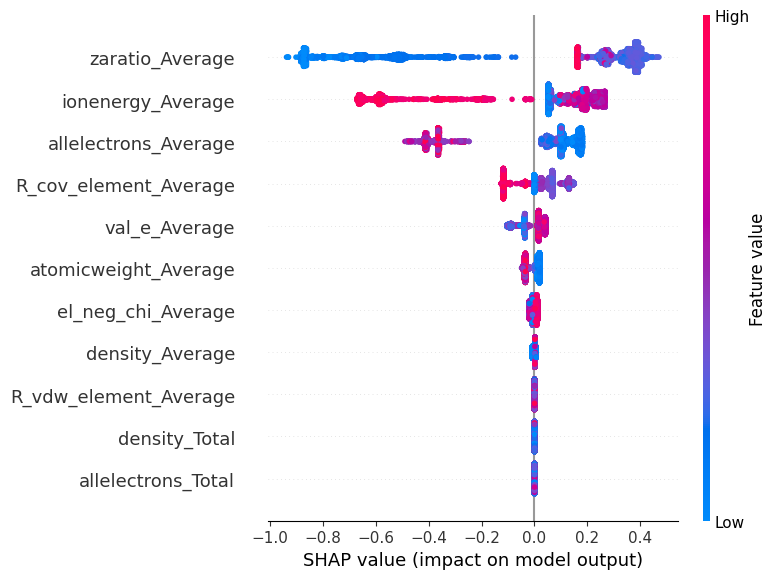

In [19]:
explainer_rf = shap.TreeExplainer(best_model_rf)
shap_values_rf = explainer_rf.shap_values(train_df_scaled)
shap.summary_plot(shap_values_rf, train_df_scaled, feature_names=train_df.columns.drop(['Hardness']))


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Making predictions on test data </div>

In [20]:
test_preds_rf = best_model_rf.predict(test_df_scaled)
test_preds_gb = best_model_gb.predict(test_df_scaled)
ensemble_preds = (test_preds_rf + test_preds_gb) / 2


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Creating submission file </div>

In [21]:
submission['Hardness'] = ensemble_preds
submission.to_csv('/kaggle/working/submission.csv', index=False)

In [22]:
submission

,id,Hardness
0,10407,2.946438
1,10408,3.721620
2,10409,5.515758
3,10410,4.308696
4,10411,4.439552
...,...,...
6934,17341,5.601433
6935,17342,4.499710
6936,17343,5.332524
6937,17344,3.897883
